In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df0 = pd.read_csv("HR_comma_sep.csv")

In [11]:
df0.columns = (
    df0.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
)

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='str')

In [12]:
# Rename columns as needed
### YOUR CODE HERE ###

df0 = df0.rename(columns={
    'satisfaction_level': 'satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'num_project',
    'average_montly_hours': 'avg_hours',
    'time_spend_company': 'tenure',
    'work_accident': 'accident',
    'promotion_last_5years': 'promotion_5y',
    'department': 'dept'
})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction', 'evaluation', 'num_project', 'avg_hours', 'tenure',
       'accident', 'left', 'promotion_5y', 'dept', 'salary'],
      dtype='str')

In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
# Display duplicated rows (all occurrences)
df0[df0.duplicated(keep=False)]
df = df0.drop_duplicates()
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.duplicated().sum()

np.int64(0)

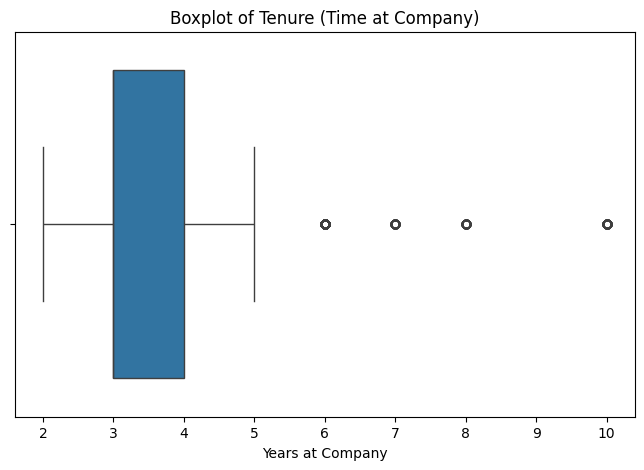

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for tenure
plt.figure(figsize=(8,5))
sns.boxplot(x=df['tenure'])
plt.title('Boxplot of Tenure (Time at Company)')
plt.xlabel('Years at Company')
plt.show()

In [16]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# Calculate IQR
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['tenure'] < Q1 - 1.5*IQR) | (df['tenure'] > Q3 + 1.5*IQR)]

# Number of rows containing outliers
num_outliers = outliers.shape[0]
print(f"Number of rows with outliers in 'tenure': {num_outliers}")

Number of rows with outliers in 'tenure': 824


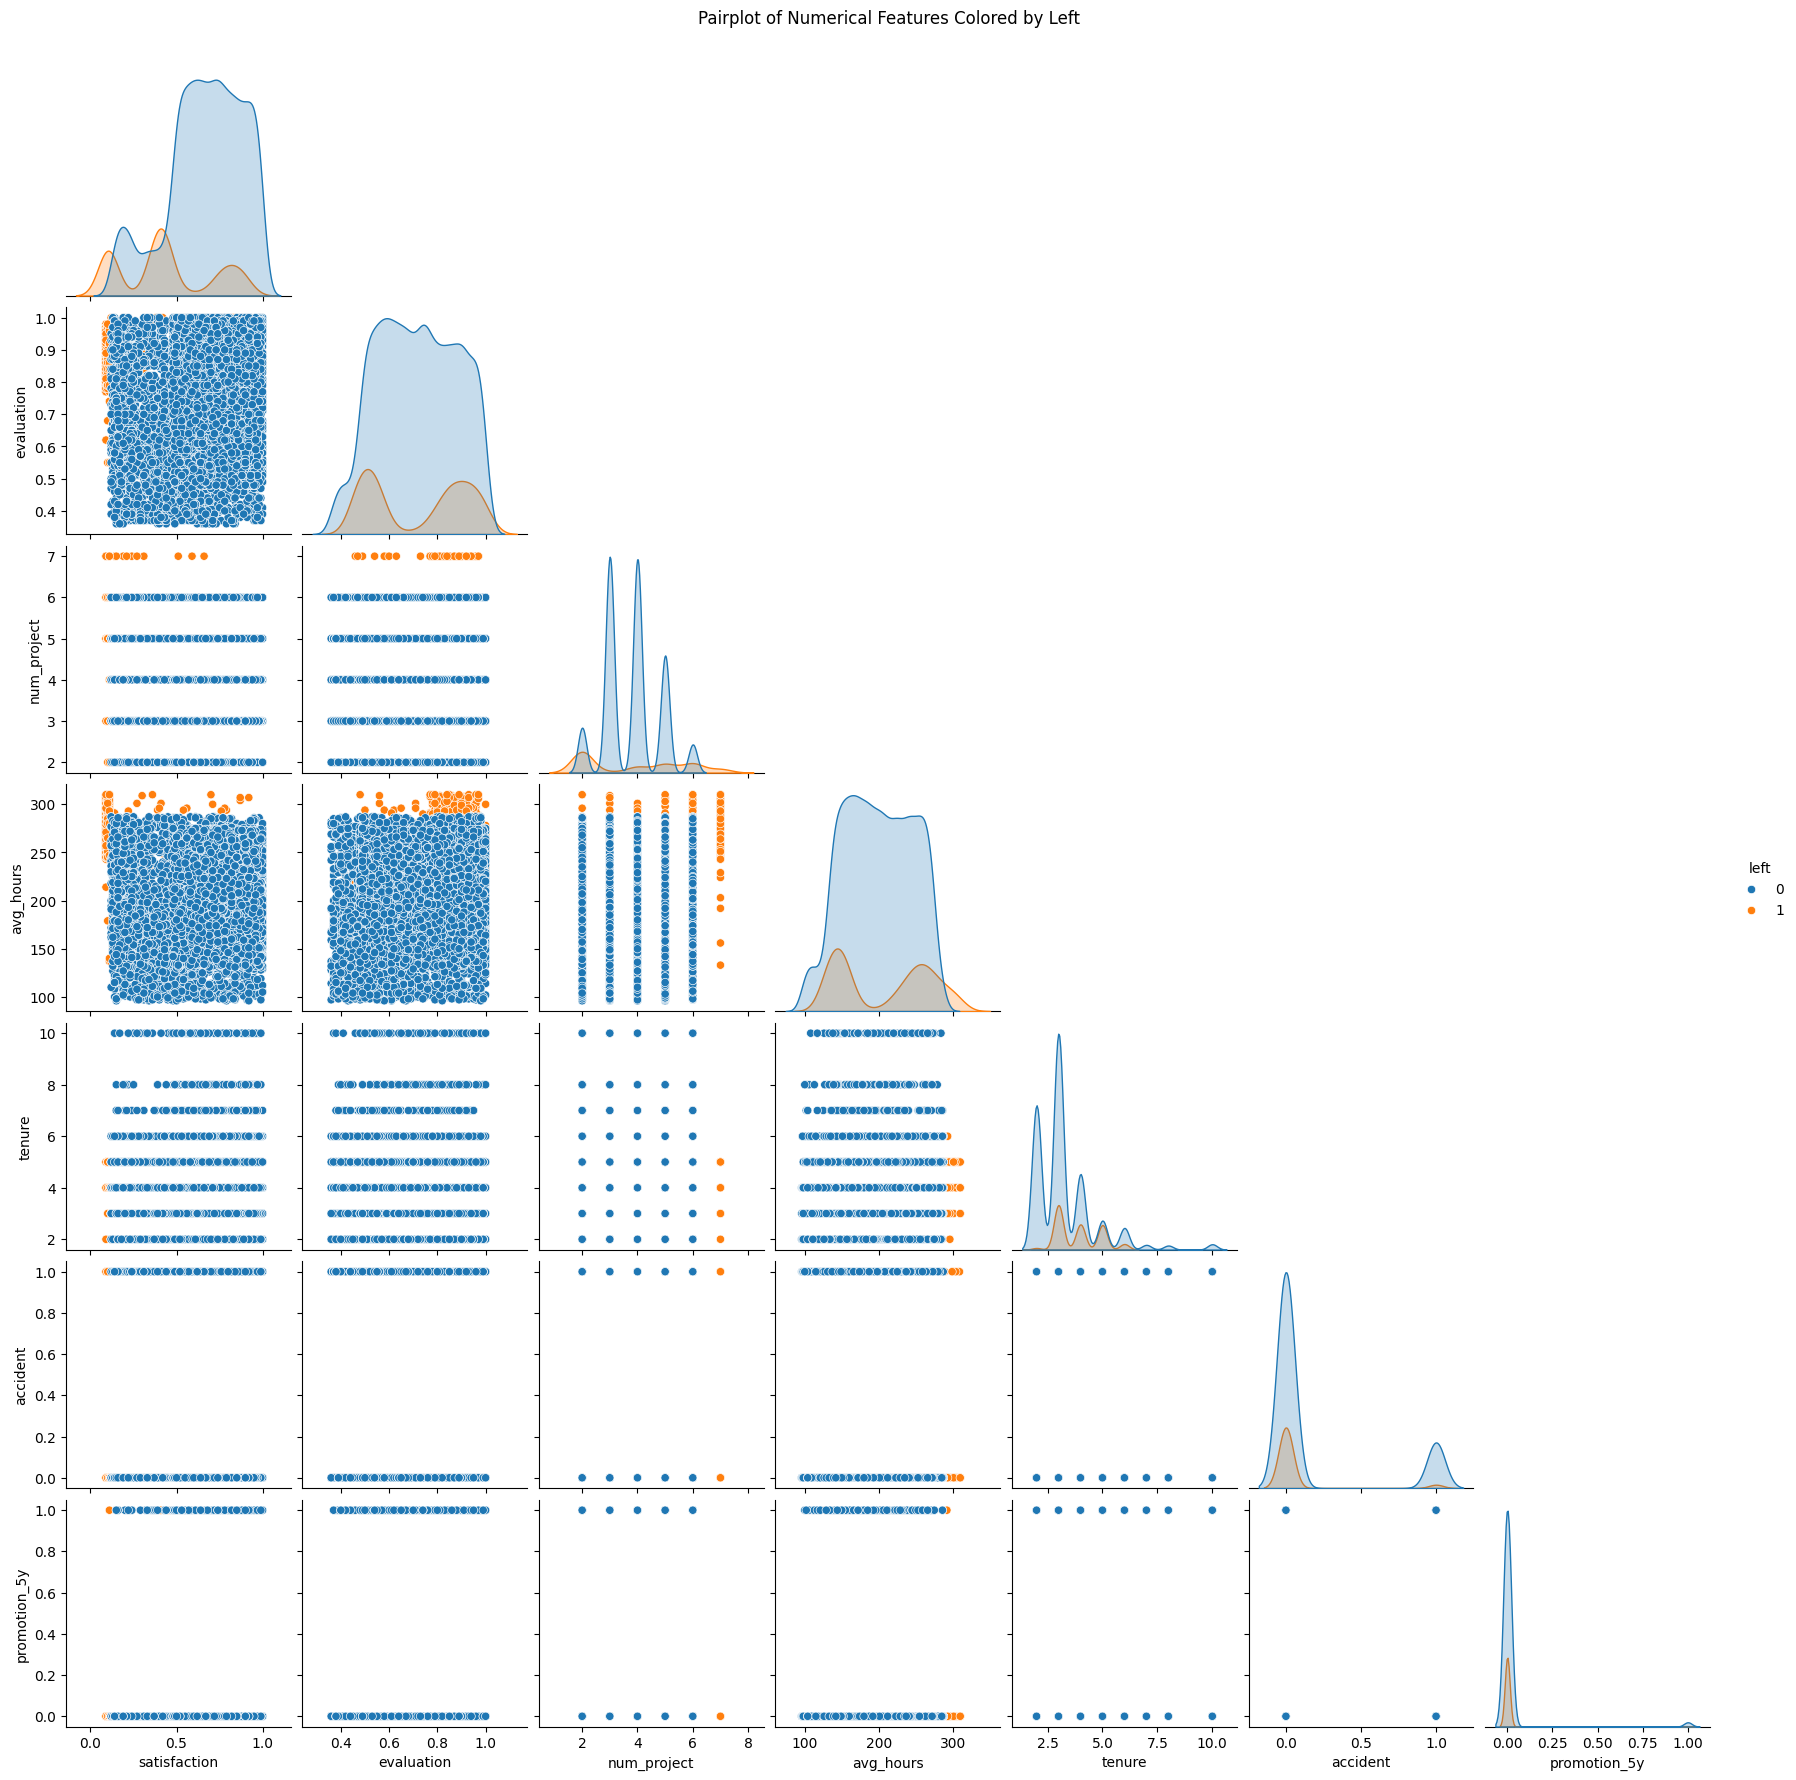

In [17]:
sns.pairplot(df, hue='left', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numerical Features Colored by Left', y=1.02)
plt.show()

C:\Users\antoi\AppData\Local\Temp\ipykernel_54276\2534699194.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=left_counts.index, y=left_counts.values, palette='pastel')


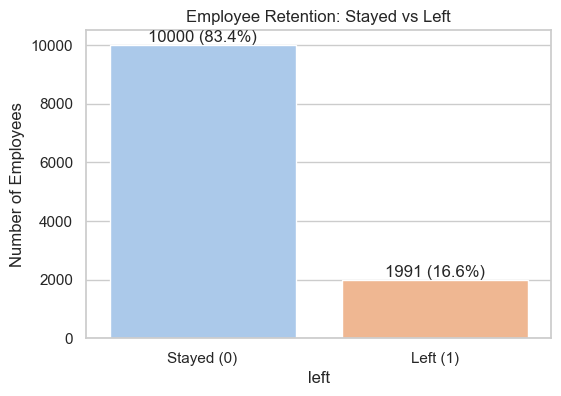

C:\Users\antoi\AppData\Local\Temp\ipykernel_54276\2534699194.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y=col, data=df, palette='Set2')


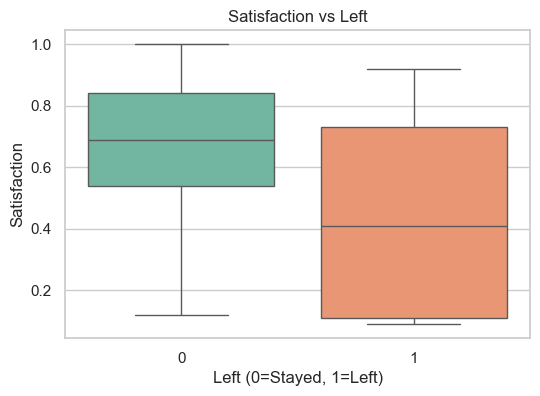

C:\Users\antoi\AppData\Local\Temp\ipykernel_54276\2534699194.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y=col, data=df, palette='Set2')


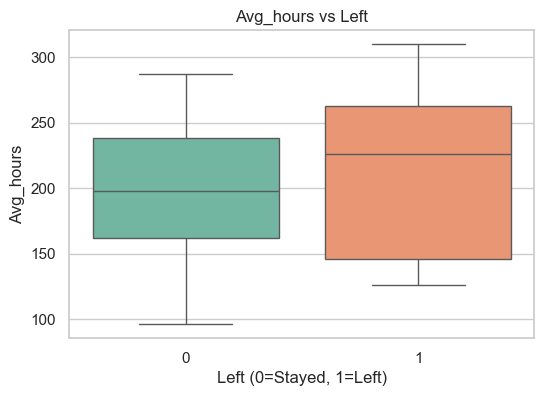

C:\Users\antoi\AppData\Local\Temp\ipykernel_54276\2534699194.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y=col, data=df, palette='Set2')


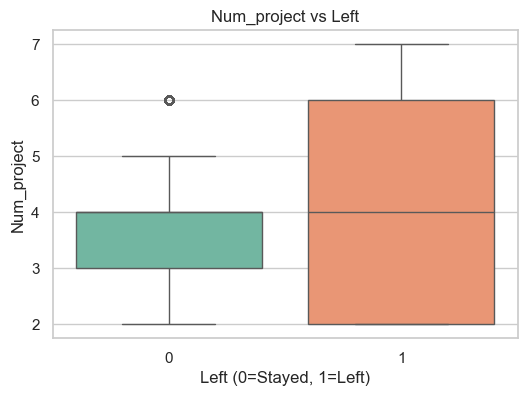

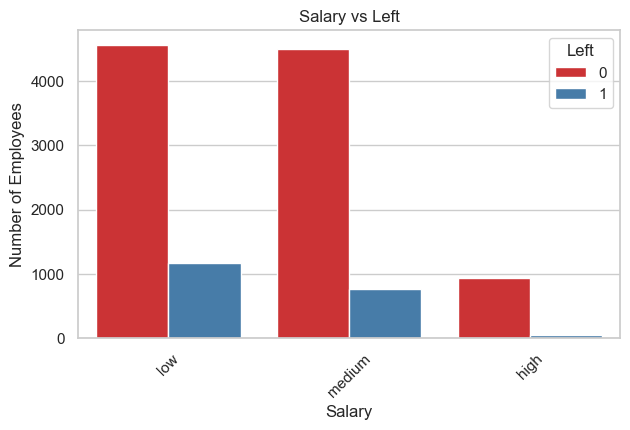

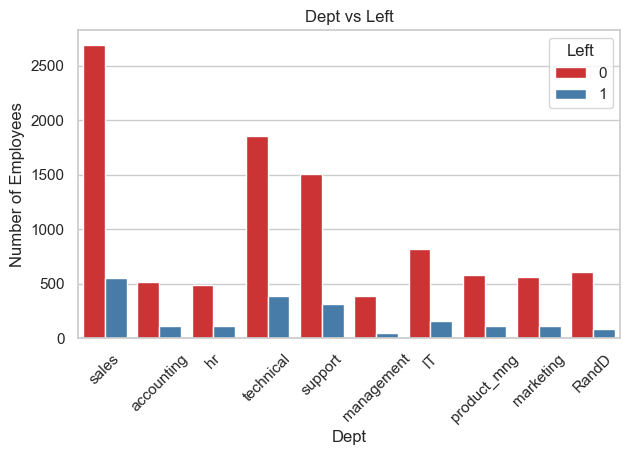

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots look nice
sns.set(style="whitegrid")

# ==============================
# 1️⃣ Bar chart of stayed vs left
# ==============================
left_counts = df['left'].value_counts()
left_percent = df['left'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=left_counts.index, y=left_counts.values, palette='pastel')
for i, val in enumerate(left_counts.values):
    plt.text(i, val + 100, f"{val} ({left_percent[i]:.1f}%)", ha='center')
plt.xticks([0,1], ['Stayed (0)', 'Left (1)'])
plt.ylabel("Number of Employees")
plt.title("Employee Retention: Stayed vs Left")
plt.show()


# ==============================
# 2️⃣ Boxplots: satisfaction, avg_hours, num_projects vs left
# ==============================
numeric_cols = ['satisfaction', 'avg_hours', 'num_project']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='left', y=col, data=df, palette='Set2')
    plt.title(f'{col.capitalize()} vs Left')
    plt.xlabel('Left (0=Stayed, 1=Left)')
    plt.ylabel(col.capitalize())
    plt.show()


# ==============================
# 3️⃣ Countplots: salary band and department vs left
# ==============================
categorical_cols = ['salary', 'dept']

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='left', data=df, palette='Set1')
    plt.title(f'{col.capitalize()} vs Left')
    plt.xlabel(col.capitalize())
    plt.ylabel('Number of Employees')
    plt.legend(title='Left', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

In [20]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 1. Define features and target
X = df.drop(columns=['left'])
y = df['left']

numeric_features = ['satisfaction', 'evaluation', 'num_project', 'avg_hours', 'tenure']
categorical_features = ['accident', 'promotion_5y', 'dept', 'salary']

# 2. Preprocessing
numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(drop='first')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 3. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Pipeline
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', log_reg)
])

# 5. Fit
clf.fit(X_train, y_train)

# 6. Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

ModuleNotFoundError: No module named 'sklearn'